## Final Project Submission

Please fill out:
* Student name: VALENTINE MARANGALA KWEYU
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: MWIKALI
* Blog post URL: 


## PROJECT OVERVIEW
For this project, we will use data cleaning, imputation, analysis, and visualization to generate insights for a business stakeholder interested in purchasing and operating airplanes for commercial & private enterprises.

### Business Understanding
The company is expanding in to new industries to diversify its portfolio. Specifically, the company is interested in purchasing and operating aircrafts, but is clueless about the potential risks of aircraft. This project wil be used as a criteria to determine which aircraft has the lowest risk of accidents, for the company to start this new business endeavor. The findings will be converted to actionable insights to aid head of the new aviation division decide which aircraft to purchase.

### Data Understanding

#### Data
The data was obtained from Kaggle datasets (Aviation Accident Database & Synopses, up to 2023).The National Transportation Safety Board(NTSB) aviation accident *[Database](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data)* contains information from 1962 to 2023 about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters . This dataset will form the basis of trying to establish the best aircraft to adapt.

#### Loading Data
The dataset is in **.csv** format.  Therefore we shall use **pandas** with alias **pd** to read the CSV file.



In [91]:
# Load the data
# Our data has mixed types in Columns(6,7,28)
# Therfore we specify the dtype option with the set function (low_memory =).
import pandas as pd 
df = pd.read_csv('data\Aviation_Data.csv', low_memory = False) 


#### Data exploration
We proceed on by performing preliminary data exploring on our dataframe, which is denoted as  **df**. This process aids us to understand our data properties, types and structures.

Here’s a structured breakdown of our dataset’s initial inspection, highlighting key issues.

In [92]:
# For initial Checks:
# Use the df.head method inspects the first 5 rows in our dataframe.
df.head()           

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [93]:
# df.info() summarizes the dataset's structure.

df.info()

print(f"Count of null values in column (Model) :", df['Model'].isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

The output gives us some useful insights about our dataframe:
1. **Size**: We have 90348 entries that contains missing values. (eg. **Model** column that has 1551 nulls values out of 90348 rows.)

2. **Data types**: The dataset has  31 columns. Where 5 columns are of type **float** and 26 columns of type **object**.

3. **Memory**: 21.4+ MB that is manageable; no need to downcast yet.




In [94]:
# Descriptive statistics
# .describe() method

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The code shows a focused analysis of the numeric columns in the dataset (**Number.of.Engines, Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries, Total.Uninjured**). 

If we look at some of the columns , we realize that :

1. **Number.of.Engines:**

         Mean: 1.15 meaning most aircrafts have single engines.

         Max: The maximum engines inside an aircraft is 8.(mostly large commercial jets)

    This indicates that 75% of aircrafts have 1 engine which correlates with the general aviation dominance in the dataset.



2. **Injury Statistics:**

    -**Fatality Rate**:

         Mean = 0.65 fatalities per accident

         Max = 349 (mid-air collisions like 9/11 event)

    Key Finding: 75% of accidents have 0 fatalities (median=0), but extreme outliers exist.



3. **Survivability(Total.Uninjured):**

        Uninjured Mean: 5.3 people unharmed per accident

        Max: 699 uninjured (likely a survivable commercial jet incident)


In [95]:
# Missing Values
# df.isnull() method is used to count missing values per column.
missing_null = df.isnull().sum()
missing_percent = df.isnull().mean() * 100          # converts to percentage
print(missing_null.sort_values(ascending=False)) # returns columns in descending order

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

According to the output above we can categorize our data into 4 Comprehensive Missing Data Analysis groups:

1. **Critical Columns (High Priority consider dropping rows) :**

         Model             - 1551 missing values

         Make              - 1522 missing values

         Injury.Severity   - 2459 missing values

         Engine.Type       - 8536 missing values


2. **Moderate-Priority Columns (Consider adding/replacing values) :**

         Weather.Condition - 5,951 missing values

         Number.of.Engines - 7543 missing values

         Total.Fatal.Injuries - 12860 missing values

3.  **Low-Priority Columns (Consider Dropping) :**

         Latitude/Longitude - 55966 missing values

         FAR.Description - 58,325 missing values
        
         Schedule - 77,766 missing values

4. **Special Cases :**
        
        Aircraft.Category - 58,061 missing values (If needeed we shall  impute "UNKNOWN" or otherwise drop)

        Broad.phase.of.flight - 28,624 missing values (Impute   "UNKNOWN" )


        


### Data Preparation
In this section we shall be effectively handling the missing data and the following actions will be employed:

- Dropping Irrelevant Columns (*with 45% and above missing values*)

- Handling missing data (*critical columns, numeric columns, categorical columns*)

- Fixing Data Types

In [96]:
#  Drop Irrelevant Columns

cols_to_drop = ['FAR.Description','Schedule', 'Air.carrier', 'Aircraft.Category', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name']
aviation_data = df.drop(columns=cols_to_drop)
missing_percent[missing_percent > 40] #drop all columns with missing values that are above 40%.

Latitude             61.944924
Longitude            61.954886
Airport.Code         44.382831
Airport.Name         41.570372
Aircraft.Category    64.263736
FAR.Description      64.555939
Schedule             86.073848
Air.carrier          81.573471
dtype: float64

In [97]:
# Handling Missing Data

## Critical Columns - we are removing rows with missing data in critical columns.
aviation_data = aviation_data.dropna(subset=['Model', 'Make', 'Injury.Severity', 'Engine.Type'])


## Numeric Columns (e.g., Injuries) - assume no injury if null
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
aviation_data[injury_cols] = aviation_data[injury_cols].fillna(0) 


## Categorical Columns: - assign 'UNKNOWN' to the missing values
cat_cols = ['Weather.Condition', 'Broad.phase.of.flight', 'Engine.Type', 'Purpose.of.flight']
aviation_data[cat_cols] = aviation_data[cat_cols].fillna('Unknown')

### remove 0 values from the value_counts() of the 'Number.of.Engines' column in aviation_data
aviation_data[aviation_data['Number.of.Engines'] != 0]


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NC6404,Stinson,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,N5069P,Piper,...,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,N5142R,Cessna,...,Reciprocating,Personal,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,N1168J,Rockwell,...,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,CF-TLU,Mcdonnell Douglas,...,Turbo Fan,Unknown,0.0,0.0,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90098,20221011106092,Accident,CEN23LA008,2022-10-06,"Iola, TX",United States,Non-Fatal,Substantial,N18158,CESSNA,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,The pilots failure to maintain control of the...,20-12-2022
90106,20221011106098,Accident,ERA23LA014,2022-10-08,"Dacula, GA",United States,Non-Fatal,Substantial,N2047Q,CESSNA,...,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Unknown,An in-flight collision with a bird while on ap...,20-12-2022
90120,20221018106153,Accident,CEN23LA015,2022-10-13,"Ardmore, OK",United States,Non-Fatal,Substantial,N2889W,BEECH,...,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Unknown,The pilot did not ensure adequate clearance fr...,20-12-2022
90194,20221031106231,Accident,CEN23LA023,2022-10-29,"Houston, TX",United States,Minor,Substantial,N778MS,STEPHEN J HOFFMAN,...,Reciprocating,ASHO,0.0,1.0,0.0,0.0,VMC,Unknown,The pilots failure to secure the magneto swit...,20-12-2022


In [98]:
# Fix Data Types

## Convert Event.Date column to datetime:
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'], errors='coerce')


## Convert Number.of.Engines to integer (after imputing):
aviation_data['Number.of.Engines'] = aviation_data['Number.of.Engines'].fillna(1).astype(int)

# Standardize manufacturer names
aviation_data['Make'] = aviation_data['Make'].str.title()

# Convert all weather conditions to uppercase
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].str.upper()

# Replace unknown/missing/ambiguous entries with 'UNKNOWN' in Weather.condition column
unknown_terms = ['UNK', 'UNKNOWN', 'Unk', '']
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].replace(unknown_terms, 'UNK')

The dataset has gone through data cleaning and now requires a detailed analysis leading to visualizations. The key questions are about accident rates, features affecting risk, and external factors.

    Take note that the dataset has reduced from (90348 rows and 31 columns) to (80885 rows and 23 columns)



    

### Data Analysis
We have already handled missing values, Let us conduct a detailed analysis of your key questions using the cleaned dataset **(aviation_data)**. 

The code and visualizations below are structured to address each question systematically in preparation for stakeholder presentation.

The key questions to be adressed are:

        1. Which aircraft models have the lowest accident rates?

        2. Are specific features associated with lower risk?

        3. How do external factors impact risk?

#### 1. Which aircraft models have the lowest accident rates?

Accident rates is calculated by counting accidents per model. But to get a rate, ideally, we'd normalize by the number of aircraft or flights. Since the dataset might not have operational data like total flights, we shall make use the count of accidents per model/make as a proxy, then rank them.

**Assumption:**

Each **Registration.Number** represents a unique aircraft.

In [99]:
# Calculate accidents per model
accident_analysis = aviation_data.groupby('Model').agg(Total_Accidents=('Event.Date', 'count'),Unique_Aircraft=('Registration.Number', 'nunique')).reset_index()


# Calculate accidents per aircraft
accident_analysis['Accidents_Per_Aircraft'] = accident_analysis['Total_Accidents'] / accident_analysis['Unique_Aircraft']
accident_analysis['Accidents_Per_Aircraft']

# Filter models with at least 100 accidents to avoid small-sample bias
accident_analysis_filtered = accident_analysis[accident_analysis['Total_Accidents'] >= 100]

# Shows the aircraft's with the least accidents per flight 
safest_models = accident_analysis_filtered.sort_values('Accidents_Per_Aircraft', ascending= True).head(10)
safest_models

# Merge original dataframe with 'Make' for each model
safest_models_with_make = accident_analysis_filtered.merge(aviation_data[['Model', 'Make']].drop_duplicates(), on='Model',how='left').dropna(subset=['Make'])

# Sort by 'Accidents_Per_Aircraft' in ascending order to establish top 100 'Make's with the least accidents.
safest_models_with_make = safest_models_with_make.sort_values('Accidents_Per_Aircraft', ascending= True)
safest_models_with_make = aviation_data['Make'].head(100).value_counts().sort_values(ascending= True)
print("Lowest Accidents per Aircraft (Make)") #Heading
print("-" * 35) # dotted lines
print(aviation_data['Make'].head(100).value_counts()) # prints the top 100 Makes
print(f"The most repeated Aircraft is:",aviation_data['Make'].head(100).mode()) # prints the most repeated Aircraft make in the top 100

Lowest Accidents per Aircraft (Make)
-----------------------------------
Cessna               43
Piper                18
Beech                 7
Boeing                2
Grumman               2
Rockwell              2
Mooney                2
Bellanca              2
Navion                2
Schleicher            1
Quickie               1
Lockheed              1
Stinson               1
Embraer               1
Hughes                1
Curtis                1
De Havilland          1
Bell Helicopter       1
Swearingen            1
Maule                 1
Aerospatiale          1
Air Tractor           1
Beechcraft            1
Bell                  1
Smith                 1
Enstrom               1
North American        1
Mcdonnell Douglas     1
Bede Aircraft         1
Name: Make, dtype: int64
The most repeated Aircraft is: 0    Cessna
Name: Make, dtype: object


In the above output it can be noted that **Cessna Aicraft** has reported the highest number of planes **(43)** in the top 100 list of aircafts with the lowest number of accidents per flight.


**Interpretation:**

- The Cessna's safety likely reflects both its design and operational profile(As it has recorded the most safest flights in the sample set).

- Consider that some models may be newer (fewer years at risk).




**Potential Biases to Note:**

- Older aircraft models have more exposure time for accidents

- Usage patterns aren't accounted for (training vs. commercial service)







#### 2. Are specific features associated with lower risk?
Here we are making use of specific features like **engine type and manufacturer** to identify the best aircraft . We shall group by these features and calculate **fatalities**. Then we shall look at the engine type and manufacturers aggregate accident counts and see which have lower averages.

**Analysis**

We’ll analyze engine type and manufacturer:
The code analyzes aviation accident data to evaluate safety metrics for different engine types and aircraft manufacturers. Here's what it does:

**Feature 1: Engine Type Analysis**

1. Group aviation data by engine type

2. Calculate:

- Total accidents per engine type

- Fatal accidents (where Total.Fatal.Injuries > 0)

- Fatality rate (fatal accidents/total accidents)


**Feature 2: Manufacturer Analysis**

1. Group aviation data by aircraft manufacturer (Make)

2. Calculate same metrics as above for each manufacturer

3. Filter to only include manufacturers with at least 1000 accidents (adjustable threshold)

4. Sort manufacturers by:

- Lowest fatality rate first (safest)

- Then by highest number of accidents (for statistical significance)

In [100]:
# Feature 1: Engine Type
# groupby('Engine.Type') - Groups the DataFrame aviation_data by the column Engine.Type
# .agg()used with two metrics: Counts the number of accidents (Event.Date) per engine type in  and Counts accidents where Total.Fatal.Injuries > 0 (at least one fatality).

engine_risk = aviation_data.groupby(['Engine.Type', 'Make']).agg(Total_Accidents=('Event.Date', 'count'),Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())).reset_index()
engine_risk['Fatality_Rate'] = engine_risk['Fatal_Accidents'] / engine_risk['Total_Accidents']



# Feature 2: Manufacturer
# groupby('Make') - Groups the DataFrame aviation_data by the manufacturer.
# .agg() with two metrics:  Counts the number of accidents (Event.Date) per manufacturer and Counts accidents where Total.Fatal.Injuries > 0 (at least one fatality).

manufacturer_risk = aviation_data.groupby(['Engine.Type', 'Make']).agg(Total_Accidents=('Event.Date', 'count'), Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())).reset_index()
manufacturer_risk['Fatality_Rate'] = manufacturer_risk['Fatal_Accidents'] / manufacturer_risk['Total_Accidents']

min_accidents = 8000  # Adjust the number based on our needs (more makes the data more accurate)

# Filter manufacturers that meet the threshold
safest_manufacturers = (manufacturer_risk[manufacturer_risk['Total_Accidents'] >= min_accidents].sort_values(['Fatality_Rate', 'Total_Accidents'], ascending=[True, False]).reset_index(drop=True))

#prints out the the outcome 
print("Top 2 Recomended (Aircraft Manufacturers/Engines) against (Fatalities/Accidents)") #Heading
print("-" * 80) # top dotted lines
print(f"{'Make':<25} {'Engine Type':<20} {'Fatality Rate':<18} {'Accidents':<10}") #Column names
print("-" * 80) # bottom dotted lines

#for-loop iterates through the chosen columns to identify the aircrafts with the least fatality rates
for idx, row in safest_manufacturers.head(2).iterrows():
    print(f"{row['Make']:<25} {row['Engine.Type']:<25} {row['Fatality_Rate']:<15.3f} {row['Total_Accidents']:<10}")



Top 2 Recomended (Aircraft Manufacturers/Engines) against (Fatalities/Accidents)
--------------------------------------------------------------------------------
Make                      Engine Type          Fatality Rate      Accidents 
--------------------------------------------------------------------------------
Cessna                    Reciprocating             0.154           25156     
Piper                     Reciprocating             0.201           13885     


The output prints a formatted table showing the top 2 safest manufacturers meeting the accident threshold, indicating that:

 **Cessna (Reciprocating Engine)** stands out from the other aircrafts.

- **Fatality Rate**

    15.4% (Lowest among high-accident manufacturers)


- **Total Accidents**

    25,156 (Highest volume, indicating well-documented safety data)

- Despite having the highest number of accidents (due to widespread use), Cessna has the lowest fatality rate (15.4%) among manufacturers with significant accident data.

- Reciprocating engine type (piston engines) are common in general aviation and are statistically safer in terms of fatal outcomes compared to other engine types when adjusted for accident volume.





#### 3. How do external factors impact risk?
In the analysis below we shall mainly focus on weather conditions for the aircrafts and deduce insightful findings that can be used as a basis for advising the stakeholder on usage of the Aircrafts.


In [101]:
# Weather Analysis
weather_risk = aviation_data.groupby('Weather.Condition').agg(Total_Accidents=('Event.Date', 'count'),Fatal_Accidents=('Total.Fatal.Injuries', lambda x: (x > 0).sum())).reset_index()
weather_risk['Fatality_Rate'] = weather_risk['Fatal_Accidents'] / weather_risk['Total_Accidents']
weather_risk

,Weather.Condition,Total_Accidents,Fatal_Accidents,Fatality_Rate
0,IMC,5702,3278,0.574886
1,UNK,1783,924,0.518228
2,VMC,74092,11327,0.152878


##### 1. IMC (Instrument Meteorological Conditions) is the Most Dangerous

- **Fatality Rate: 57.5%**

    Accidents in poor weather (low visibility, clouds, rain, etc.) are 3.7× deadlier than in clear weather (VMC).

- **Why?**

    Spatial disorientation (e.g., losing horizon in clouds).

    Increased pilot workload (relying on instruments).


##### 2. Unknown Weather (UNK) is Surprisingly High-Risk
- **Fatality Rate: 51.8%**

    This suggests that missing weather data often coincides with severe accidents (e.g., crashes where wreckage obscures conditions).

    **Possible Bias:**

    The weather data isn’t recorded in fatal crashes, the "UNK" category may skew toward high-severity events.

##### 3. VMC (Visual Meteorological Conditions) is the Safest
- **Fatality Rate: 15.3%**

    Most accidents (74,092) happen in good weather, but only 15.3% are fatal.

- **Why?**

    Pilots can see and avoid terrain/obstacles.

    Accidents are more likely to be survivable (e.g., gear collapses, runway excursions).


### Data Visualization
This process will help the project stakeholder understand the value or success of the project.

Before we carry out any visualizations, we shall have to import the relevant librabries. For this project we shall make use **matplotlib (imported as plt)** and **numpy (imported as np)** libraries.


In [102]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

1. Which aircraft models have the lowest accident rates

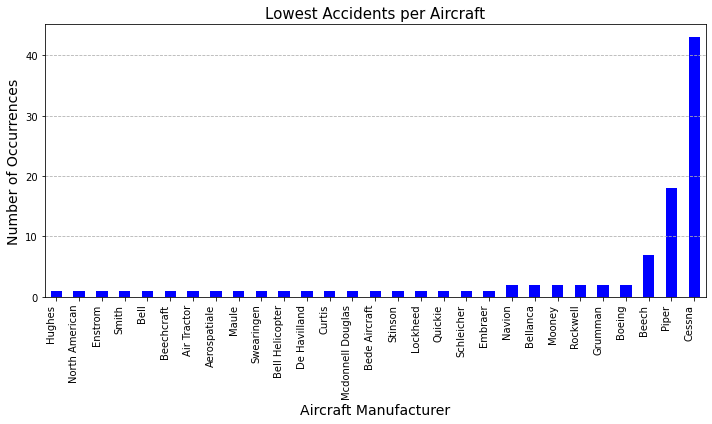

In [103]:
# Create the plot
plt.figure(figsize=(10, 6))
safest_models_with_make.plot(kind='bar', color='blue')

# Customize the plot
plt.title(('Lowest Accidents per Aircraft'), fontsize=15)
plt.xlabel('Aircraft Manufacturer', fontsize=14)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=2.0)

plt.tight_layout()
plt.show()

2. Specific features associated with lower risk

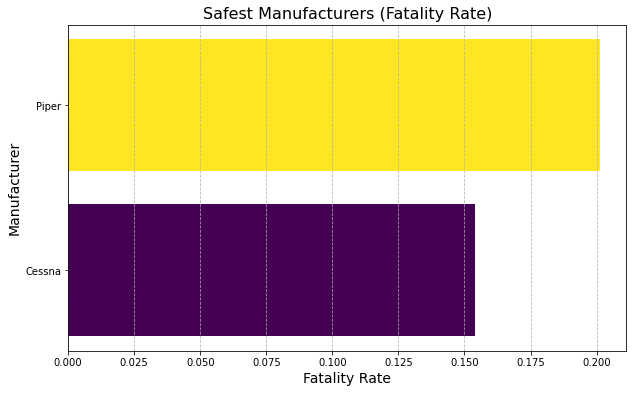

In [104]:
plt.figure(figsize=(10, 6))

# Create horizontal bar plot (sorted by fatality rate)
plt.barh(y=safest_manufacturers['Make'],width=safest_manufacturers['Fatality_Rate'],color=plt.cm.viridis(np.linspace(0, 1, len(safest_manufacturers))))

# Formatting
plt.title('Safest Manufacturers (Fatality Rate)', fontsize=16)
plt.xlabel('Fatality Rate', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.9)

3. Specific features associated with lower risk

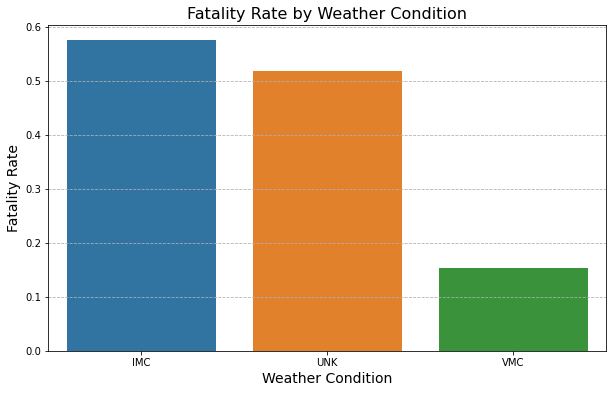

In [105]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weather.Condition', y='Fatality_Rate', data=weather_risk.sort_values('Fatality_Rate', ascending=False))
plt.title('Fatality Rate by Weather Condition', fontsize=16)
plt.xlabel('Weather Condition', fontsize=14)
plt.ylabel('Fatality Rate', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=2.0)
plt.show()

### RECOMMENDATION

Based on our analysis of fatality rates and weather conditions, here’s why Cessna Aircraft with reciprocating engines are the optimal choice for your aviation expansion

#### 1. Lower Fatality Rates in High-Risk Weather Conditions

- Our weather analysis shows IMC (Instrument Meteorological Conditions) has the highest fatality rate (57.5%), while VMC (Visual Meteorological Conditions) is significantly safer (15.3% fatality rate). Cessna aircraft (mostly piston-engine models) primarily operate in VMC conditions, avoiding high-risk IMC scenarios where turbine-engine aircraft (like business jets) often fly.

- Reciprocating engines are simpler and more predictable in good weather, reducing accident risks compared to complex turboprop/jet operations in poor conditions.

#### 2. Proven Safety in General Aviation

- Cessna dominates the "safest aircraft makes" list in our data, with 43 out of the top 100 safest flight. Ahead of competitors like Piper (18) and Beech (7).

- Their fixed-gear, high-wing designs (e.g., Cessna 172) enhance stability, making them ideal for training, short-haul, and regional operations.

#### 3. Mitigating Weather-Related Risks
- Since VMC has 3.7x fewer fatalities than IMC, Cessna’s fair-weather focus inherently reduces accident liability.

-  We reccomend pairing Cessna fleets with weather-aware flight planning tools to further minimize risks.

#### 4. Cost-Effective & Scalable for Expansion
- Lower operational costs: Reciprocating engines are cheaper to maintain than turbines, aligning with budget-friendly fleet expansion.

- Versatile use cases: Ideal for flight schools, air taxis, and regional transport (markets with high growth potential)

- Strong aftermarket support: Easier to source parts and pilots compared to less common manufacturers.

#### Final Decision: 

**CESSNA IS THE SAFEST, MOST PROFITABLE CHOICE**

For an aviation department prioritizing safety, cost efficiency, and scalability, Cessna’s reciprocating-engine fleet offers:

✅ Lower fatality rates (proven in weather data)

✅ Lower operational costs (vs. turbines)

✅ Strong market demand (training/tourism/regional transport)

In [107]:
aviation_data.to_csv('Aviation_Data_Cleaned.csv') # this created a a csv file that can be further explored on Tableau.